just for testing 


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdramdani","key":"0850d17ece69fcc4d3fdbf3d1fa789d4"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#data set api 
!kaggle datasets download -d ruchi798/bookcrossing-dataset

 85% 65.0M/76.1M [00:01<00:00, 47.6MB/s]
100% 76.1M/76.1M [00:01<00:00, 68.3MB/s]


In [ ]:
#code to extract bookcrossing-dataset.zip
from zipfile import ZipFile
file_name="bookcrossing-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")


done


In [ ]:
#import
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



In [ ]:
books_rat=pd.read_csv("/content/Book reviews/Book reviews/BX-Book-Ratings.csv",sep=';', encoding='latin-1',low_memory=False)
users=pd.read_csv("/content/Book reviews/Book reviews/BX-Users.csv",sep=';', encoding='latin-1',low_memory=False)
books=pd.read_csv("/content/Book reviews/Book reviews/BX_Books.csv",sep=';', encoding='latin-1',low_memory=False)
data=pd.read_csv("/content/Books Data with Category Language and Summary/Preprocessed_data.csv")
users.columns


Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
data2=data.drop_duplicates(subset="isbn")
data2.columns

Index(['Unnamed: 0', 'user_id', 'location', 'age', 'isbn', 'rating',
       'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_s', 'img_m', 'img_l', 'Summary', 'Language', 'Category', 'city',
       'state', 'country'],
      dtype='object')

In [ ]:
print(data2["isbn"].nunique(),data2["Category"].nunique())


270170 6448


In [ ]:
print(books_rat.shape," \n",books_rat.columns)
print(books_rat.head())

(1149780, 3)  
 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


In [ ]:
print(users.shape,"\n",users.columns)
print(users.head())

(278858, 3) 
 Index(['User-ID', 'Location', 'Age'], dtype='object')
   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN


In [ ]:
print(books.shape,"\n",books.columns)
print(books.head())

(271379, 8) 
 Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
         ISBN  ...                                        Image-URL-L
0  0195153448  ...  http://images.amazon.com/images/P/0195153448.0...
1  0002005018  ...  http://images.amazon.com/images/P/0002005018.0...
2  0060973129  ...  http://images.amazon.com/images/P/0060973129.0...
3  0374157065  ...  http://images.amazon.com/images/P/0374157065.0...
4  0393045218  ...  http://images.amazon.com/images/P/0393045218.0...

[5 rows x 8 columns]


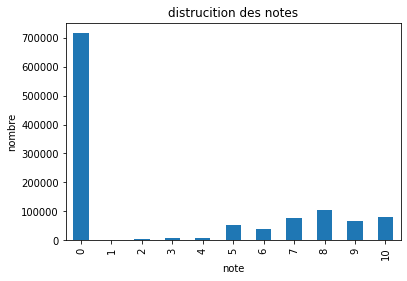

In [ ]:
#distrubution des notes 
plt.rc("font")
books_rat["Book-Rating"].value_counts(sort=False).plot(kind="bar")
plt.title("distrucition des notes")
plt.xlabel("note")
plt.ylabel("nombre")
plt.show()


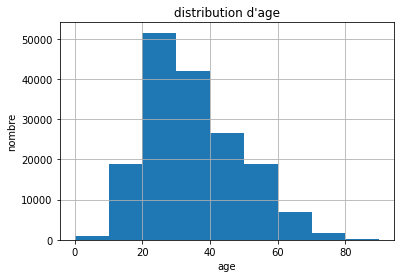

In [ ]:
#distrubution d'age 'User-ID', 'Location', 'Age'
"""users["Age"].value_counts(sort=False).plot(kind="bar")
plt.title("distribution d'age")
plt.xlabel("age")
plt.ylabel("nombre")
plt.show()"""
users["Age"].hist(bins=[0,10,20,30,40,50,60,70,80,90])
plt.title("distribution d'age")
plt.xlabel("age")
plt.ylabel("nombre")
plt.show()




 **BASÉ sur les notes**

In [ ]:
#nombre de note pour chaque livre dapres le id ISBN 
rating_count=pd.DataFrame(books_rat.groupby("ISBN")["Book-Rating"].count())
#classer dans lordre dec
rating_count.sort_values("Book-Rating",ascending=False).head()


,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [ ]:
#most 5 famous from the dataset
most_rated_books=pd.DataFrame(["0971880107","0316666343","0385504209","0060928336","0312195516"],index=np.arange(5),columns=["ISBN"])
print(most_rated_books.head())
most_rated_books_names=pd.merge(most_rated_books, books,on='ISBN')
most_rated_books_names 

         ISBN
0  0971880107
1  0316666343
2  0385504209
3  0060928336
4  0312195516


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


on utilise la corrélation de Pearson pour calculer la similarité 

In [ ]:
#moyenne des notes donner a un livre
average_rating=pd.DataFrame(books_rat.groupby("ISBN")["Book-Rating"].mean())
#on ajoute un column qui contient le nombre de vote pour chaque livre
average_rating["nombre vote"]=pd.DataFrame(books_rat.groupby("ISBN")["Book-Rating"].count())
#on les class dans l'ordre dec
average_rating.sort_values("nombre vote",ascending=False)



,Book-Rating,nombre vote
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
...,...,...
0801064090,0.000000,1
0801064252,5.000000,1
0801064279,0.000000,1


on enleve les livre avec moins de X rating count et les utilisateur qui n'ont pas noté plus de Y livre


In [ ]:
#on enleve les utilisateur avec moins de 200 livre deja noté  I
print(books_rat.shape)
groupe1= books_rat["User-ID"].value_counts()
books_rat=books_rat[books_rat["User-ID"].isin(groupe1[groupe1>=200].index)]
print(books_rat.shape)
groupe2=books_rat["ISBN"].value_counts()
books_rat=books_rat[books_rat["ISBN"].isin(groupe2[groupe2>=100].index)]
print(books_rat.shape)

(1149780, 3)
(527556, 3)
(13793, 3)


In [ ]:
#creation de la matrice user-item 
user_item=books_rat.pivot(index="User-ID",columns="ISBN")['Book-Rating']
user_id=user_item.index
isbn=user_item.columns
user_item

ISBN,0060502258,0060928336,0060930535,0060934417,0060976845,0060987103,0061009059,006101351X,014028009X,0140293248,0142001740,0156027321,0312195516,0312278586,0312924585,0312966091,0312983271,0316096199,0316284955,0316601950,0316666343,0316776963,0345313860,0345337662,0345342968,0345353145,0345361792,0345370775,0345378490,0345380371,0345391055,0345443284,0375706771,0375707972,0375727345,0380018179,0380730138,0385265700,0385335482,0385484518,...,0440226430,0440234743,0440236673,044023722X,0440241073,0446310786,0446364193,044651652X,0446601241,0446605239,0446606812,0446607657,0446608955,0446610038,0446611212,0446672211,0449212602,0452282152,0452282829,0515131229,0553268880,0553279912,0553280341,0553572997,059035342X,0671001795,0671003755,0671021001,0671027360,0671510053,067976402X,0679781587,068484477X,0743418174,0786868716,080410526X,0804106304,080410753X,0971880107,1400034779
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,0.0,8.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3363,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,10.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277427,NaN,NaN,0.0,0.0,NaN,NaN,9.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,8.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
277478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN


In [ ]:
#on prends un livre de notre dataset par son ISBN 

id="0060934417"
book2=books[books["ISBN"]==id]
print("notre livre est : ",book2["Book-Title"])


notre livre est :  1485    Bel Canto: A Novel
Name: Book-Title, dtype: object


In [ ]:
#on prend un livre pr exemple 
test_book =user_item[id]
#on calcule avec les autres livres de la matrice
similaire_to_test=user_item.corrwith(test_book)
corr_book=pd.DataFrame(similaire_to_test,columns=["pearsone value"])
corr_book.dropna(inplace=True)
#on cree une matrice qui contient les valeur de pearsone avec le nombre de vote et on garde les livres voté par >300
corr_summary=corr_book.join(average_rating["nombre vote"]).reset_index()
#jajoute les noms des livres
#books_test=pd.merge(books_test,books_data[["isbn","book_title"]],on="isbn",how="inner")
corr_summary=pd.merge(corr_summary,books[['ISBN', 'Book-Title']],on="ISBN",how="inner")
corr_summary[corr_summary["nombre vote"]>=300].sort_values("pearsone value",ascending=False)



,ISBN,pearsone value,nombre vote,Book-Title
3,0060934417,1.000000,350,Bel Canto: A Novel
5,0060987103,0.556458,326,Wicked: The Life and Times of the Wicked Witch...
88,0671027360,0.446678,586,Angels & Demons
40,0385492081,0.380565,341,Into Thin Air : A Personal Account of the Mt. ...
24,0345342968,0.322404,321,Fahrenheit 451
...,...,...,...,...
45,0439064872,-0.277336,351,Harry Potter and the Chamber of Secrets (Book 2)
63,044023722X,-0.289716,647,A Painted House
64,0440241073,-0.290040,456,The Summons
93,0786868716,-0.345171,427,The Five People You Meet in Heaven


In [ ]:
# on cree une fonction qui fais le test